 # Gasoline Price Predictive Analysis: using Tensor Flow and Auto Keras

## Gasoline Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.

### In this project we will try to forecast the different gasoline prices for the upcoming dates given to us. 

### We will use LSTM and ARIMA forecasting models to predict the prices then we will see how we can implement the same using Auto Keras, which is an Auto ML Library.

## Pipeline of the project:
- Data Analysis
- Model Building and predictions using ML techniques
- Model Building and prediction using Auto Keras(Auto ML)

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
import os
os.getcwd()

data = pd.read_csv("train_data.csv")
data.head() 

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis and splitting the data**

In [3]:
data.head()
data.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [4]:
df = data.dropna()

In [5]:
df.rename(columns={"Petrol (USD)": "Gasoline"}, inplace = True)
df.head()

C:\Users\prabhjyoth.mattummal\AppData\Local\Temp\ipykernel_22032\3178545418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Petrol (USD)": "Gasoline"}, inplace = True)


,Date,Gasoline
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


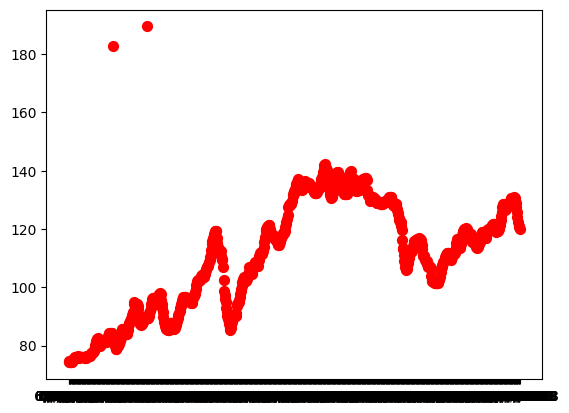

In [11]:
plt.scatter(df.Date, df.Gasoline,color='red',label='Prices', s=50)

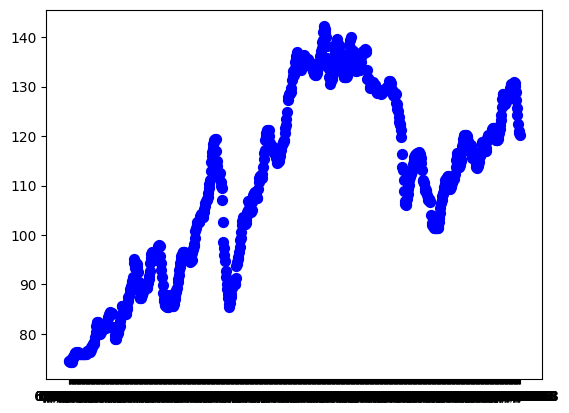

In [12]:
df2 = df[df.Gasoline<160]

plt.scatter(df2.Date, df2.Gasoline,color='blue',label='Prices', s=50)


In [13]:
df3 = df2.reset_index()['Gasoline']
df3.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Gasoline, dtype: float64

LSTM models are sensitive to the scale of the data, so we need to transform the data to be in the range [0, 1] using MinMaxScaler.

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df3 = scaler.fit_transform(np.array(df3).reshape(-1,1))

Train-Test Split

In [15]:
training_size = int(len(df3)*0.65)    # 65% of the training data
test_size = len(df3) - training_size
train_data, test_data = df3[0:training_size,:], df3[training_size:len(df3),:1]

In [16]:
train_data.shape
test_data.shape

(284, 1)

## Data Preprocessing

In [17]:
import numpy
 
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [48]:
X_train

array([[[0.00559152],
        [0.00382578],
        [0.00309005],
        ...,
        [0.16627428],
        [0.16524426],
        [0.1640671 ]],

       [[0.00382578],
        [0.00309005],
        [0.00206004],
        ...,
        [0.16524426],
        [0.1640671 ],
        [0.16274279]],

       [[0.00309005],
        [0.00206004],
        [0.00103002],
        ...,
        [0.1640671 ],
        [0.16274279],
        [0.15538552]],

       ...,

       [[0.91024132],
        [0.91597999],
        [0.90847557],
        ...,
        [0.88419659],
        [0.88655091],
        [0.88743378]],

       [[0.91597999],
        [0.90847557],
        [0.88802237],
        ...,
        [0.88655091],
        [0.88743378],
        [0.87154208]],

       [[0.90847557],
        [0.88802237],
        [0.88449088],
        ...,
        [0.88743378],
        [0.87154208],
        [0.87639788]]])

In [49]:
Y_train

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [24]:
print(X_train.shape), print(Y_train.shape)

(424, 100)
(424,)


(None, None)

# LSTM 
The Long Short-Term Memory (LSTM) is a recurrent neural network that learns to predict the next

In [25]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 [==============================] - 5s 244ms/step - loss: 0.1728 - val_loss: 0.0842
Epoch 2/100
7/7 [==============================] - 2s 233ms/step - loss: 0.0345 - val_loss: 0.0183
Epoch 3/100
7/7 [==============================] - 2s 232ms/step - loss: 0.0268 - val_loss: 0.0050
Epoch 4/100
7/7 [==============================] - 2s 297ms/step - loss: 0.0136 - val_loss: 0.0120
Epoch 5/100
7/7 [==============================] - 2s 275ms/step - loss: 0.0106 - val_loss: 0.0057
Epoch 6/100
7/7 [==============================] - 2s 264ms/step - loss: 0.0090 - val_loss: 0.0051
Epoch 7/100
7/7 [==============================] - 2s 228ms/step - loss: 0.0076 - val_loss: 0.0038
Epoch 8/100
7/7 [==============================] - 2s 242ms/step - loss: 0.0067 - val_loss: 0.0035
Epoch 9/100
7/7 [==============================] - 1s 213ms/step - loss: 0.0066 - val_loss: 0.0038
Epoch 10/100
7/7 [==============================] - 2s 236ms/step - loss: 0.0066 - val_loss: 0.0034
Epoch 11/

In [28]:
### Lets Do the prediction and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

6/6 [==============================] - 0s 26ms/step


In [29]:
##Transformback to original form

train_predict = scaler.inverse_transform(train_predict) 
test_predict = scaler.inverse_transform(test_predict)

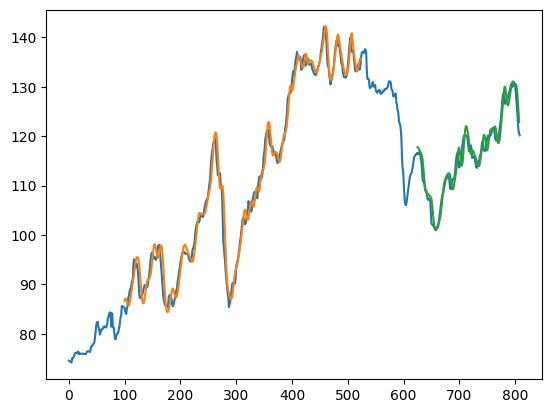

In [30]:
### Plotting 
# shift train predictions for plotting

look_back = 100

trainPredictPlot = numpy.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df3)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df3)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
df_test=pd.read_csv("test_data.csv")
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [32]:
model.save("Gasoline Price Prediction")

INFO:tensorflow:Assets written to: Gasoline Price Prediction\assets


INFO:tensorflow:Assets written to: Gasoline Price Prediction\assets


## **Using ARIMA**

In [33]:
!pip install --upgrade patsy

Defaulting to user installation because normal site-packages is not writeable


In [34]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [35]:
!pip install --upgrade --no-deps statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [36]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime 
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\prabhjyoth.mattummal\AppData\Local\Temp\ipykernel_2300\3328119907.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Recalling the df3 dataframe

In [39]:
data = pd.read_csv("C:/Programming Practice Notebooks/PROJECTS/Gasoline Prices Time Series Analysis/train_data.csv")
df = data.dropna()
df.rename(columns={"Petrol (USD)": "Gasoline"}, inplace = True)
df2 = df[df.Gasoline<160]
df3 = df2.reset_index()['Gasoline']
df3.head()

C:\Users\prabhjyoth.mattummal\AppData\Local\Temp\ipykernel_2300\2020278093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Petrol (USD)": "Gasoline"}, inplace = True)


0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Gasoline, dtype: float64

In [40]:
model1 = ARIMA(df3.values, order=(5,1,0))
model_fit1 = model1.fit()

# predicting the next 30 values

output1 = model_fit1.forecast(steps=30)
output1

array([119.80670598, 119.52143353, 119.30634699, 119.14818607,
       119.02925496, 118.93899221, 118.8707173 , 118.81917637,
       118.78030458, 118.75097731, 118.72884034, 118.71213024,
       118.69951771, 118.68999847, 118.68281387, 118.67739125,
       118.67329846, 118.67020939, 118.66787788, 118.66611816,
       118.66478999, 118.66378755, 118.66303095, 118.66245989,
       118.66202889, 118.66170358, 118.66145805, 118.66127274,
       118.66113287, 118.6610273 ])

# Using Auto ML

 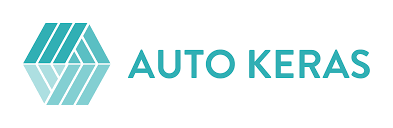

## AutoKeras: An AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University

## Installing Auto Keras

In [41]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1


Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to c:\users\prabhjyoth.mattummal\appdata\local\temp\pip-req-build-bihd45tq
  Resolved https://github.com/keras-team/keras-tuner.git to commit 0fb69434a132093518e0e53d40020145ae192629
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=86083 sha256=dee472e03ca387d080f7a007ca3a2383936ae137af7a551bdbdc0a2d3465542c
  Stored in directory: C:\Users\prabhjyoth.mattummal\AppData\Local\Temp\pip-ephem-wheel-cache-bir78u3_\wheels\b8\e6\44\4b6aa4a149abdabe9752582dbd7d7ae0848e87fe71cd2c59ed
Successfully built keras-tuner


  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-tuner.git 'C:\Users\prabhjyoth.mattummal\AppData\Local\Temp\pip-req-build-bihd45tq'
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629


In [42]:
!pip install autokeras

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 148.6/148.6 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 466.8/466.8 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 176.1/176.1 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 5.0/5.0 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 100.6/100.6 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.0.2rc1
    Uninstalling keras-tuner-1.0.2rc1:
      Successfully uninstalled keras-tuner-1.0.2rc1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [43]:
!pip show autokeras

Name: autokeras
Version: 1.1.0
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: c:\users\prabhjyoth.mattummal\appdata\roaming\python\python310\site-packages
Requires: keras-nlp, keras-tuner, packaging, pandas, tensorflow
Required-by: 


In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf

import autokeras as ak

In [46]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

In [54]:

reg.fit(x=X_train, y=Y_train, verbose=0)

ValueError: Expect the data to StructuredDataInput to have shape (batch_size, num_features), but got input shape [32, 100, 1].

In [51]:

# evaluate the model
mae, _  = reg.evaluate(X_test, Y_test, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
Yhat_test = reg.predict(X_test)

# get the best performing model
model = reg.export_model()


NotFoundError: NewRandomAccessFile failed to Create/Open: .\structured_data_regressor\best_pipeline : The system cannot find the file specified.
; No such file or directory

In [ ]:
# summarize the loaded model
model.summary()

In [ ]:
Yhat_train= reg.predict(X_train)

In [ ]:
train_predict=scaler.inverse_transform(Yhat_train)
test_predict=scaler.inverse_transform(Yhat_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(Y_test,Yhat_test)

In [ ]:
mean_squared_error(Y_train,Yhat_train)